Kiersten Wener and Eli Chesnut

The CIFAR 10 dataset is a dataset of 60,0000 images (in color, sized 32 x 32). It has 6,000 images per class and the classes include airplane, automobile. bird, cat, deer, frog, horse, ship, and truck. There are 50,000 test images and 10,000 training images. 

There are multiple business applications for a model that is able to classify the images in this dataset. The model will  have the ability to distinguish many animals (birds, cats, deer, frogs, and horses). The model could be used by a conservationalist group like the World Wildlife Fund or by the US National Park Service to monitor wildlife. Both of these groups are interested in preserving  natural ecosystems, and in order to do so, they have to be aware of concentrations of animal species in a specific area and their movement. If a survalence system was set up in an area where a species is at risk, the wildlife organization could put the large number of images captured though our model to identify the type of animal in the image to ....... This would allow them to accuraetly update their records and ....., so they can adjust their conservation measures accordingly, based on the ..... 

For this dataset, we will evaluate using Precision and Recall to find F1 score as a metric to justify our model. For the business case we discussed above, it may have more serious implications if there is a large amount of false positives. For example, if the deer population in an area that was under survalence was at risk, and our model falsely identified other objects (like horses, dogs, cats, etc) as deer, the US National Park Service would be under the impression that no intervention is needed to maintain the balance in the ecosystem, when that is not the truth. If efforts aren't taken for conservation, like......., it could disrupte.......

Because of this, a high precision is especially important for this model. A high precision ensures a small number of false positives. However, it is also important to recognize false negatives to be able to identify the true populations of animals in the survaled areas. For this reason, we will focus on the F1 score of the model, which balances the precision and recall scores to provide a robust predictor of the model's performance in real life scenarios. 

We will use an 80/20 split to divide our data into testing and training becasue......... 

We will be using sh

In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(pd.__version__)
print(np.__version__)






2.2.3
2.0.2


one hot encode and turn to numpy

In [36]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    y_test_single = np.argmax(y_test, axis=1)


    acc = mt.accuracy_score(y_test_single,yhat)
    cm = mt.confusion_matrix(y_test_single,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=class_names,yticklabels=class_names)
    
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.title(title_text+'{:.4f}'.format(acc))

In [85]:
def compare_cnn(net1, net2, net3, net4, X_test, y_test, title_text = ''):
    plt.figure(figsize=(15,12))
    if  net1 is not None:
        yhat1 = np.argmax(net1.predict(X_test), axis=1)
        y_test_single1 = np.argmax(y_test, axis=1)
        plt.subplot(2,2,1)

        acc = mt.accuracy_score(y_test_single1,yhat1)
        cm = mt.confusion_matrix(y_test_single1,yhat1)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=class_names,yticklabels=class_names)
        
        plt.xlabel("Predicted Labels", fontsize=14)
        plt.ylabel("True Labels", fontsize=14)
        plt.title('cnn1 '+'{:.4f}'.format(acc))


    if  net2 is not None:
        yhat2 = np.argmax(net2.predict(X_test), axis=1)
        y_test_single2 = np.argmax(y_test, axis=1)
        plt.subplot(2,2,2)

        acc = mt.accuracy_score(y_test_single2,yhat2)
        cm = mt.confusion_matrix(y_test_single2,yhat2)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=class_names,yticklabels=class_names)
        
        plt.xlabel("Predicted Labels", fontsize=14)
        plt.ylabel("True Labels", fontsize=14)
        plt.title('cnn2 '+'{:.4f}'.format(acc))


    if  net3 is not None:
        yhat3 = np.argmax(net3.predict(X_test), axis=1)
        y_test_single3 = np.argmax(y_test, axis=1)
        plt.subplot(2, 2, 3)

        acc = mt.accuracy_score(y_test_single3,yhat3)
        cm = mt.confusion_matrix(y_test_single3,yhat3)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=class_names,yticklabels=class_names)
        
        plt.xlabel("Predicted Labels", fontsize=14)
        plt.ylabel("True Labels", fontsize=14)
        plt.title('resnet1 '+'{:.4f}'.format(acc))


    if  net4 is not None:
        yhat4 = np.argmax(net4.predict(X_test), axis=1)
        y_test_single4 = np.argmax(y_test, axis=1)
        plt.subplot(2,2,4)

        acc = mt.accuracy_score(y_test_single4,yhat4)
        cm = mt.confusion_matrix(y_test_single4,yhat4)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=class_names,yticklabels=class_names)
        
        plt.xlabel("Predicted Labels", fontsize=14)
        plt.ylabel("True Labels", fontsize=14)
        plt.title('resnet2 '+'{:.4f}'.format(acc))

    
    

In [5]:

import setuptools.dist
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation
from tensorflow.keras.layers import RandomContrast, RandomBrightness
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.metrics import Precision, Recall


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,         # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,     # Randomly translate images horizontally
    height_shift_range=0.2,    # Randomly translate images vertically
    shear_range=0.15,          # Shear transformations
    zoom_range=0.15,           # Zoom in or out on images
    horizontal_flip=True,      # Flip images horizontally
    fill_mode='nearest',       # Fill in missing pixels after transformations
    rescale=1./255             # Normalize pixel values to [0, 1]
)

https://keras.io/api/datasets/cifar10/

https://www.cs.toronto.edu/~kriz/cifar.html



In [7]:
import numpy as np
import keras
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Flatten the arrays for easier processing
y_train = y_train.flatten()
y_test = y_test.flatten()

# Set the number of samples per class (160 for training, 40 for testing)
samples_per_class = 200
train_samples_per_class = 160
test_samples_per_class = 40

# Initialize lists to store the downsampled data
X_train_balanced = []
y_train_balanced = []
X_test_balanced = []
y_test_balanced = []

# For each class (0 through 9)
for class_id in range(10):
    # Get the indices of samples in each class
    train_indices = np.where(y_train == class_id)[0]
    test_indices = np.where(y_test == class_id)[0]

    # Shuffle and select the samples
    np.random.shuffle(train_indices)
    np.random.shuffle(test_indices)

    # Select the appropriate number of samples
    selected_train_indices = train_indices[:train_samples_per_class]
    selected_test_indices = test_indices[:test_samples_per_class]

    # Append the selected data and labels to the balanced lists
    X_train_balanced.append(X_train[selected_train_indices])
    y_train_balanced.append(y_train[selected_train_indices])
    X_test_balanced.append(X_test[selected_test_indices])
    y_test_balanced.append(y_test[selected_test_indices])

# Convert the lists to numpy arrays
X_train_balanced = np.concatenate(X_train_balanced)
y_train_balanced = np.concatenate(y_train_balanced)
X_test_balanced = np.concatenate(X_test_balanced)
y_test_balanced = np.concatenate(y_test_balanced)

# Print the class distribution
print(f"Class distribution in training set: {np.bincount(y_train_balanced)}")
print(f"Class distribution in test set: {np.bincount(y_test_balanced)}")

# Verify the shapes of the new datasets
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"X_test_balanced shape: {X_test_balanced.shape}")


Class distribution in training set: [160 160 160 160 160 160 160 160 160 160]
Class distribution in test set: [40 40 40 40 40 40 40 40 40 40]
X_train_balanced shape: (1600, 32, 32, 3)
X_test_balanced shape: (400, 32, 32, 3)


Here, we took a subset of the dataset to make our testing and training data. We did this in a way that insured that the classes are balanced to be sure each class is represented in the training of our model.......

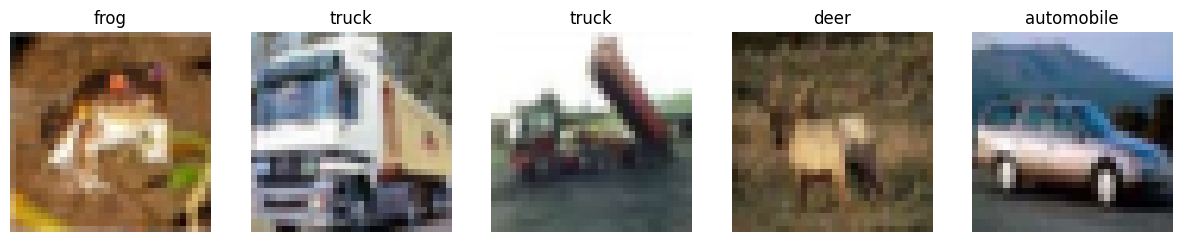

In [8]:
plt.figure(figsize=(15, 10))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(5):
    plt.subplot(1, 5, i + 1)  
    plt.title(class_names[y_train[i]])
    plt.imshow(X_train[i]) 
    plt.axis('off')  

plt.show()  # 


In [9]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes =10)

import numpy as np

# Convert image data lists to NumPy arrays

X_test = np.array(X_test).astype('float32') / 255.0 
X_train = np.array(X_train).astype('float32') / 255.0 


https://medium.com/@abhishekjainindore24/all-about-convolutions-kernels-features-in-cnn-c656616390a1

The first model is an AlexNet convolutional model. It is relatively simple. It has two comvolutional layers, with max pooling only being applied after the second one. There is then dropout for regularization after the convolutional layers, and then two dense layers. 

Generally speaking, a kernel is a small matrix of weights, with the size specified in the code.  The kernel slides across the input image and does element-wise multiplication with the pixels and its weights. This then produces a feature map that highlights patterns/features in the images. 


In [10]:


cnn = Sequential()

# add in augmentations directly
cnn.add( RandomFlip("horizontal") ) # flip horizontally
cnn.add( RandomRotation(0.05) ) # rotate by 5%
cnn.add( RandomTranslation(height_factor=0.1, width_factor=0.1) ) # move by 10%
cnn.add( RandomBrightness(factor=0.1, value_range=(0.0, 1.0)) ) # add some to the mean
cnn.add( RandomContrast(0.1) ) # add or decrease contrast
# let's start with an AlexNet style convolutional phase
cnn.add(Conv2D(filters=32,
                input_shape = (32,32,3),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

cnn.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(10, activation='softmax'))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=['accuracy', 'recall', 'precision'])

cnn.build((None,32,32,3))

cnn.summary()

plot_model(
    cnn, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation              │ (None, 32, 32, 3)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness               │ (None, 32, 32, 3)      │             0 │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 32, 32, 3)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [11]:

history = cnn.fit(X_train, y_train, 
                  batch_size=64, 
                   epochs=40, verbose=1,
                   validation_data=(X_test, y_test)
                  )

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 62ms/step - accuracy: 0.2944 - loss: 1.9072 - precision: 0.5289 - recall: 0.0558 - val_accuracy: 0.5163 - val_loss: 1.3276 - val_precision: 0.7529 - val_recall: 0.2797
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.4397 - loss: 1.5409 - precision: 0.6659 - recall: 0.1888 - val_accuracy: 0.5418 - val_loss: 1.2815 - val_precision: 0.7174 - val_recall: 0.3473
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.4760 - loss: 1.4476 - precision: 0.6790 - recall: 0.2402 - val_accuracy: 0.5798 - val_loss: 1.1768 - val_precision: 0.7437 - val_recall: 0.4051
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.4990 - loss: 1.3954 - precision: 0.6945 - recall: 0.2722 - val_accuracy: 0.5974 - val_loss: 1.1220 - val_precision: 0.7574 - val_recall: 0.4177
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.5137 - loss: 1.3586 - precision: 0.7086 - recall: 0.2970 - val_accuracy: 0.5850 - va

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


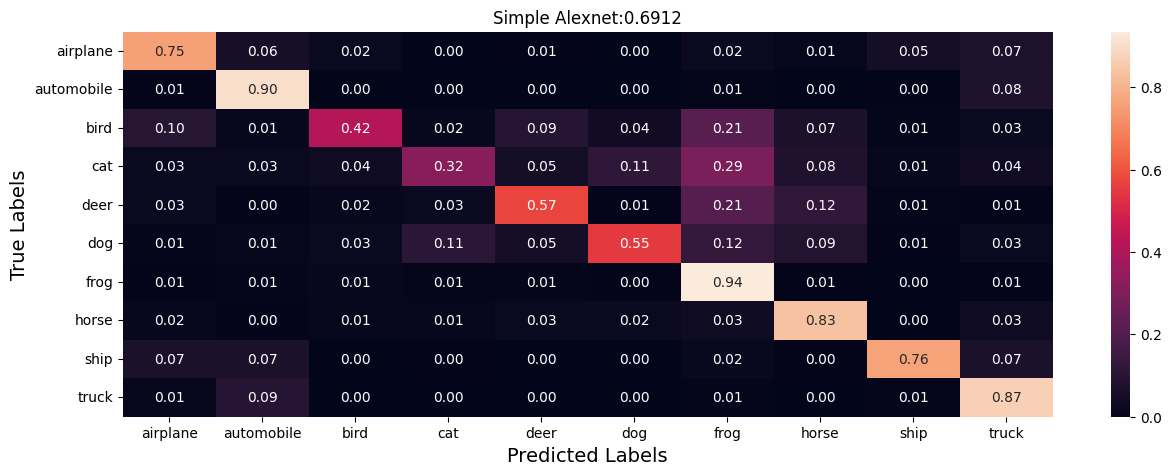

In [37]:
summarize_net(cnn, X_test, y_test, title_text='Simple Alexnet:')

As we can see by this graph, the most common misclassifications mostly occur between the animals. For example, images that are truly of cats, birds, and deer are often misclassified as frogs. This makes logical sense, because animals often have the same general shape, with the same features like eyes, ears, and a nose. It would be much more worrisome if a frog was getting mistaken for an airplane frequently.

The same is happening with truck and automobile. These two classes have similar features so it makes logical sense that they would be mixed up with eachother. 

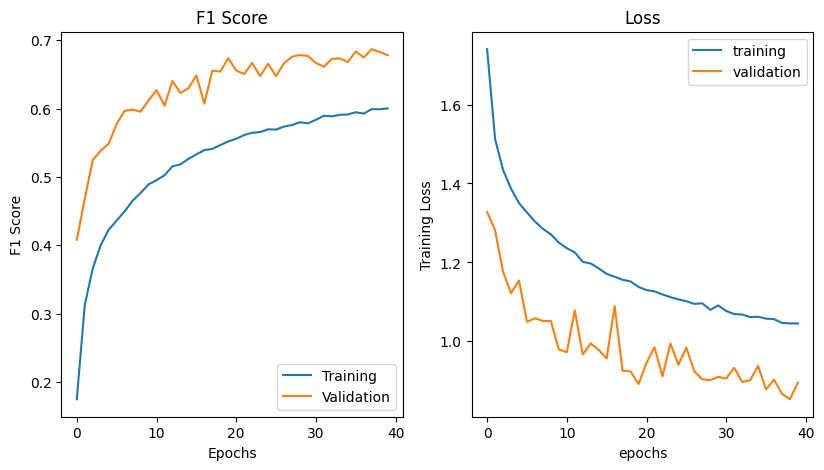

In [53]:
import numpy as np

# Calculate F1 score for training and validation
train_f1 = 2 * (np.array(history.history['precision']) * np.array(history.history['recall'])) / (np.array(history.history['precision']) + np.array(history.history['recall']) + 1e-6)
val_f1 = 2 * (np.array(history.history['val_precision']) * np.array(history.history['val_recall'])) / (np.array(history.history['val_precision']) + np.array(history.history['val_recall']) + 1e-6)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_f1, label='Training')
plt.plot(val_f1, label='Validation')
plt.title('F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()


plt.subplot(1,3,2)
plt.plot(history.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()


In [90]:

from sklearn.metrics import f1_score

recall_history1 = history.history['val_recall']  # Average recall across epochs
precision_history1 = history.history['val_precision']


f1_scores1 = 2 * (np.array(precision_history1) * np.array(recall_history1)) / (np.array(precision_history1) + np.array(recall_history1))

# Calculate the average F1 score
max_f1_score1 = np.max(f1_scores1)

# Print the average F1 score
print("Max F1 Score:", max_f1_score1)
# Select the class with the highest probability

print(f'Highest validation recall across epochs: {np.max(recall_history1)}')
print(f'Highest validation precision across epochs: {np.max(precision_history1)}')

Max F1 Score: 0.6869033202936308
Highest validation recall across epochs: 0.6015999913215637
Highest validation precision across epochs: 0.8018150329589844


As we can see by the graphs above. which plot accuracy and loss for validation and testing data arcross eopochs, the models are converging. We can tell this by...

https://www.geeksforgeeks.org/how-to-choose-kernel-size-in-cnn/
https://medium.com/@vishnuam/dropout-in-convolutional-neural-networks-cnn-422a4a17da41#:~:text=Dropout%20improves%20generalization%3A%20It%20forces,generalize%20better%20to%20unseen%20data.

In the model below (cnn2), i slightly modified the alexnet style convolutional neural network. Traditionally, the kernel size of the first convolutional layer is 3 x 3, but I changed it to 2 x 2. "Smaller kernal sizes capture more local information, while larger kernel sizes capture intricate features". A kernel that is too small can lead to information loss but a kernel that is too big can lose the fine details in the input image. 

With the smaller kernel size, there will be 4 weights per filter, instead of 9 in the previous cnn. This reduces the number of multiplications and parameters in this model. Since the model is comparing different types of animals and has to differentiate between an automobile and truck, etc (which can be difficult even for humans), it is important for the model to pick up on the small details that may differentiate the images. This is why i chose to reduce the size of the kernel instead of increasing it. 

I increased the dropout rate from .25 to .4 for the fully connected layer (the dense layer), which means that half of the neurons in the layer are dropped in each iteration, instead of 1/4 like before. This decreases the risk of overfitting and encourages slower learning. It also increases the generalization of the model by increasing the noise during the training of the model. According to my research, smaller dropout rates, like .25 are better for the convolutional layers, which is why i left the first dropout rate as .25. It is good to use a larger dropout rate for the dense layers because of the large number of parameters, which can increase the risk of overfitting. 

In [16]:


cnn2 = Sequential()

# add in augmentations directly
cnn2.add( RandomFlip("horizontal") ) # flip horizontally
cnn2.add( RandomRotation(0.05) ) # rotate by 5%
cnn2.add( RandomTranslation(height_factor=0.1, width_factor=0.1) ) # move by 10%
cnn2.add( RandomBrightness(factor=0.1, value_range=(0.0, 1.0)) ) # add some to the mean
cnn2.add( RandomContrast(0.1) ) # add or decrease contrast
# let's start with an AlexNet style convolutional phase
#here, changed kernel size to 2 x 2 instead of 3 x 3
cnn2.add(Conv2D(filters=32,
                input_shape = (32,32,3),
                kernel_size=(2,2), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn2.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

cnn2.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn2.add(Dropout(0.25)) # increased the dropout from .25 to .35
cnn2.add(Flatten())
cnn2.add(Dense(128, activation='relu'))
cnn2.add(Dropout(0.4)) # add some dropout for regularization, again!
cnn2.add(Dense(10, activation='softmax'))

# Let's train the model 
cnn2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=['accuracy', 'recall', 'precision'])

cnn2.build((None,32,32,3))

cnn2.summary()

plot_model(
    cnn2, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_1            │ (None, 32, 32, 3)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness_1             │ (None, 32, 32, 3)      │             0 │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_1               │ (None, 32, 32, 3)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,482 (8.08 MB)

 Trainable params: 2,117,482 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [17]:

history2 = cnn2.fit(X_train, y_train, 
                  batch_size=64, 
                   epochs=40, verbose=1,
                   validation_data=(X_test, y_test)
                  )

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step - accuracy: 0.3153 - loss: 1.8688 - precision: 0.5623 - recall: 0.0736 - val_accuracy: 0.5276 - val_loss: 1.2738 - val_precision: 0.7219 - val_recall: 0.3193
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 66ms/step - accuracy: 0.4742 - loss: 1.4533 - precision: 0.6841 - recall: 0.2420 - val_accuracy: 0.5867 - val_loss: 1.1498 - val_precision: 0.7348 - val_recall: 0.4330
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.5195 - loss: 1.3400 - precision: 0.7047 - recall: 0.3038 - val_accuracy: 0.6053 - val_loss: 1.1078 - val_precision: 0.7394 - val_recall: 0.4579
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.5373 - loss: 1.2869 - precision: 0.7197 - recall: 0.3387 - val_accuracy: 0.6394 - val_loss: 1.0129 - val_precision: 0.7717 - val_recall: 0.4953
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.5604 - loss: 1.2373 - precision: 0.7310 - recall: 0.3703 - val_accuracy: 0.6516 - va

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


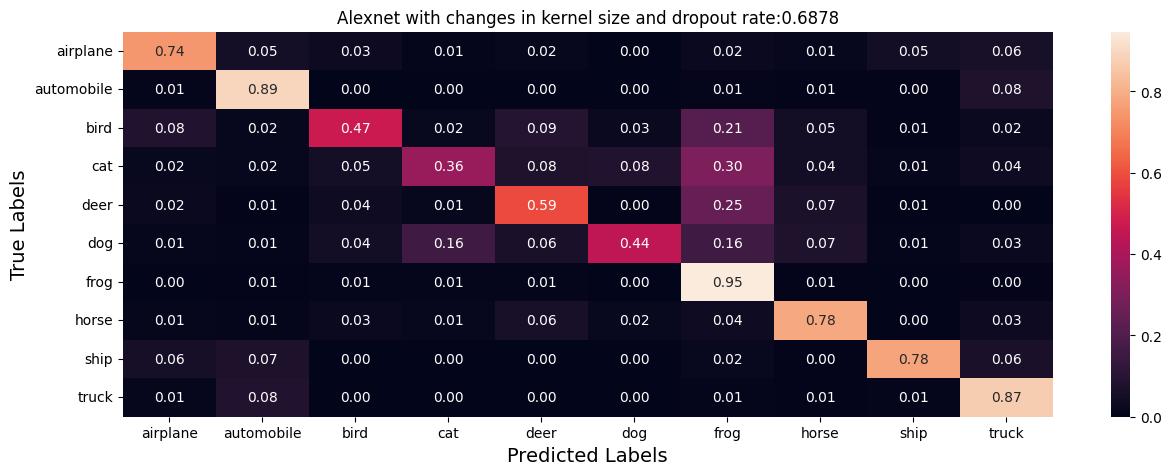

In [55]:
summarize_net(cnn2, X_test, y_test, title_text='Alexnet with changes in kernel size and dropout rate:')

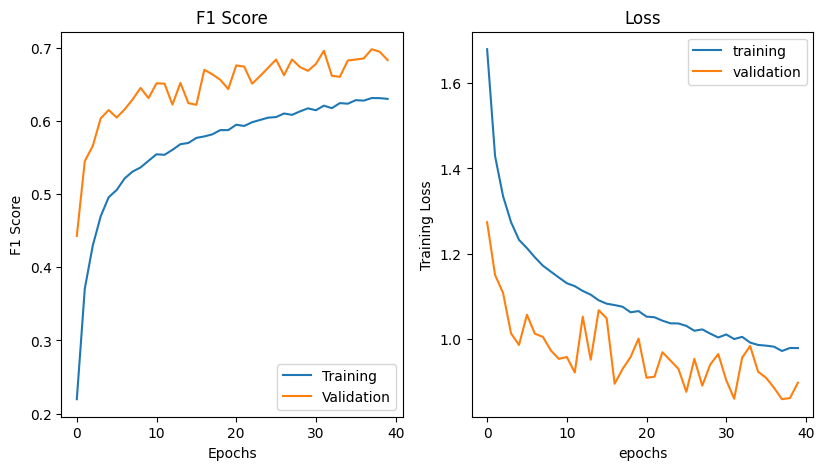

In [60]:
import numpy as np

# Calculate F1 score for training and validation
train_f1_2 = 2 * (np.array(history2.history['precision']) * np.array(history2.history['recall'])) / (np.array(history2.history['precision']) + np.array(history2.history['recall']) + 1e-6)
val_f1_2 = 2 * (np.array(history2.history['val_precision']) * np.array(history2.history['val_recall'])) / (np.array(history2.history['val_precision']) + np.array(history2.history['val_recall']) + 1e-6)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_f1_2, label='Training')
plt.plot(val_f1_2, label='Validation')
plt.title('F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()


plt.subplot(1,3,2)
plt.plot(history2.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history2.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()



# plt.subplot(1,3,3)
# plt.plot(history2.history['precision'], label='training')

# plt.ylabel('Precision')
# plt.title('Training')
# plt.plot(history2.history['val_precision'], label='validation')
# plt.title('Precision')
# plt.legend()

# plt.show()

In [89]:
recall_history2 = history2.history['val_recall']  # Average recall across epochs
precision_history2 = history2.history['val_precision']

f1_scores2 = 2 * (np.array(precision_history2) * np.array(recall_history2)) / (np.array(precision_history2) + np.array(recall_history2))

# Calculate the average F1 score
max_f1_score2 = np.max(f1_scores2)

# Print the average F1 score
print("Highest F1 Score:", max_f1_score2)

print(f'Highest validation recall across epochs: {np.max(recall_history2)}')
print(f'Highest validation precision across epochs: {np.max(precision_history2)}')

Highest F1 Score: 0.6977057302362139
Highest validation recall across epochs: 0.6245999932289124
Highest validation precision across epochs: 0.7945572733879089


In [21]:
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model
l2_lambda = 0.000001
input_holder = Input(shape=(32, 32, 3))

# start with a conv layer
x = RandomFlip("horizontal")(input_holder)  # Flip horizontally
x  = RandomRotation(0.05)(x)  # Rotate by 5%
x  = RandomTranslation(height_factor=0.1, width_factor=0.1)(x)  # Move by 10%
x  = RandomBrightness(factor=0.1, value_range=(0.0, 1.0))(x)  # Add brightness
x  = RandomContrast(0.1)(x)  # Add or decrease contrast

x = Conv2D(filters=32,
               input_shape = (32,32,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(10)(x)
x = Activation('softmax')(x)

resnet = Model(inputs=input_holder,outputs=x)

resnet.summary()

/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 16,    │      9,248 │ max_pooling2d_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 32)  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 8, 8, 64)  │      2,112 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8, 32)  │      2,080 │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 8, 8, 32)  │          0 │ conv2d_8[0][0],   │
│                     │                   │            │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 8, 8, 32)  │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 4, 4, 32)  │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 512)       │          0 │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 512)       │          0 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │    131,328 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256)       │          0 │ dense_4[0][0]     │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 256)       │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 10)        │      2,570 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 10)        │          0 │ dense_5[0][0]     │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 185,162 (723.29 KB)

 Trainable params: 185,162 (723.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
resnet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy', 'recall', 'precision'])


In [23]:
history3 = resnet.fit(X_train, y_train, batch_size=64, 
                      epochs=40, verbose=1,
                      validation_data=(X_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=10)]
                     )

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.2721 - loss: 2.0518 - precision: 0.4383 - recall: 0.0573 - val_accuracy: 0.4920 - val_loss: 1.3930 - val_precision: 0.7102 - val_recall: 0.2130
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.4762 - loss: 1.4441 - precision: 0.6759 - recall: 0.2519 - val_accuracy: 0.5630 - val_loss: 1.2305 - val_precision: 0.7698 - val_recall: 0.3307
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5358 - loss: 1.2780 - precision: 0.7124 - recall: 0.3472 - val_accuracy: 0.5890 - val_loss: 1.1449 - val_precision: 0.7440 - val_recall: 0.4219
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5732 - loss: 1.1982 - precision: 0.7334 - recall: 0.3963 - val_accuracy: 0.6296 - val_loss: 1.0446 - val_precision: 0.7962 - val_recall: 0.4521
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.6007 - loss: 1.1255 - precision: 0.7430 - recall: 0.4373 - val_accuracy: 0.6459 - va

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


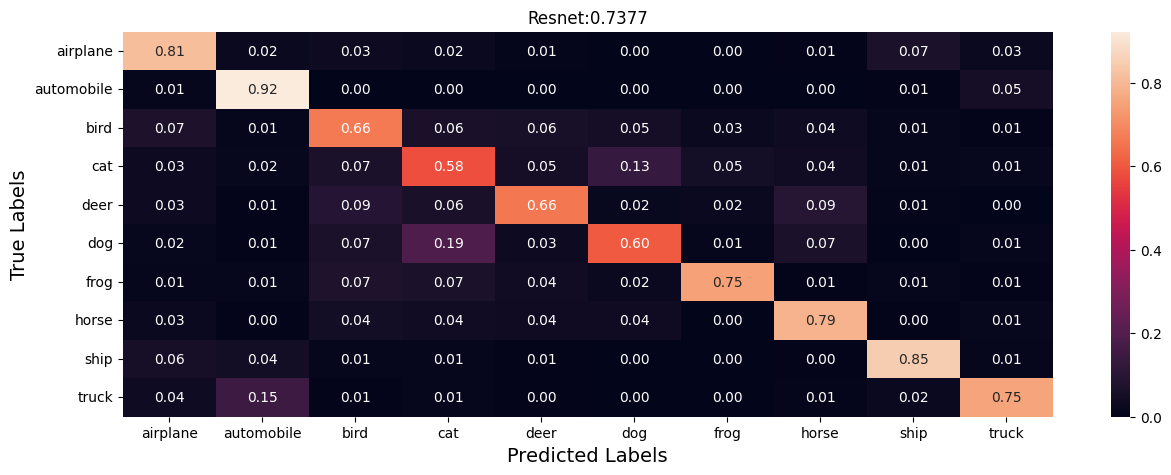

In [57]:
summarize_net(resnet, X_test, y_test, title_text='Resnet:')

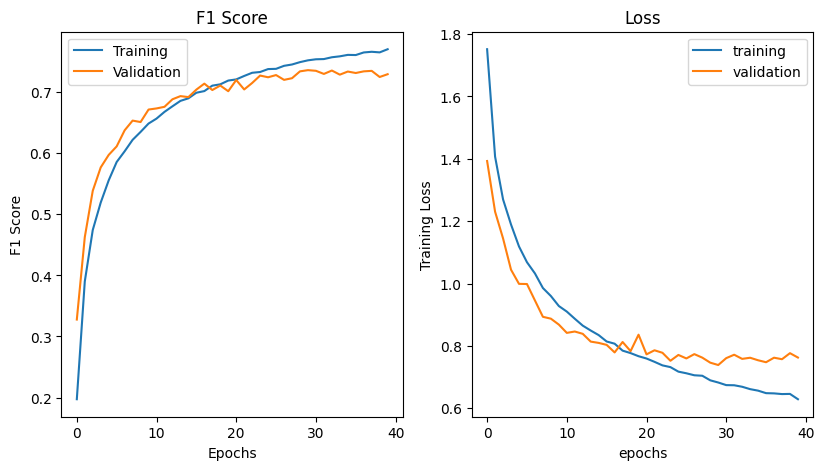

In [70]:
# Calculate F1 score for training and validation
train_f1_3 = 2 * (np.array(history3.history['precision']) * np.array(history3.history['recall'])) / (np.array(history3.history['precision']) + np.array(history3.history['recall']) + 1e-6)
val_f1_3 = 2 * (np.array(history3.history['val_precision']) * np.array(history3.history['val_recall'])) / (np.array(history3.history['val_precision']) + np.array(history3.history['val_recall']) + 1e-6)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_f1_3, label='Training')
plt.plot(val_f1_3, label='Validation')
plt.title('F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()


plt.subplot(1,3,2)
plt.plot(history3.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history3.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()



# plt.subplot(1,3,3)
# plt.plot(history2.history['precision'], label='training')

# plt.ylabel('Precision')
# plt.title('Training')
# plt.plot(history2.history['val_precision'], label='validation')
# plt.title('Precision')
# plt.legend()

# plt.show()

In [88]:
recall_history3 = history3.history['val_recall']  # Average recall across epochs
precision_history3 = history3.history['val_precision']


f1_scores3 = 2 * (np.array(precision_history3) * np.array(recall_history3)) / (np.array(precision_history3) + np.array(recall_history3))

# Calculate the average F1 score
max_f1_score3 = np.max(f1_scores3)

# Print the average F1 score
print("max F1 Score:", max_f1_score3)
print(f'highest validation recall across epochs: {np.max(recall_history3)}')
print(f'highest validation precision across epochs: {np.max(precision_history3)}')

max F1 Score: 0.7358671681821356
highest validation recall across epochs: 0.6625000238418579
highest validation precision across epochs: 0.8453354239463806


changes kernal sizes

Ensemble Net, we explicitly define inputs and outputs to have more control over network topology
Use resnet style bypass

https://massedcompute.com/faq-answers/?question=Can+increasing+the+number+of+filters+in+a+convolutional+neural+network+always+improve+its+performance%3F#:~:text=The%20number%20of%20filters%20in%20a%20CNN%20determines%20the%20number,image%20classification%20or%20object%20detection. 

increase the filters :  According to my research, it is good to start with a smaller number of filters in the initial layers, and then increase them in the later layers

I changed lots of the filter numbers. The larger number of filters helps the 

In [27]:
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model
l2_lambda = 0.000001
input_holder2 = Input(shape=(32, 32, 3))

# start with a conv layer
#Here, changed kernel size to 2 x 2 instead of traditional 3 x 3
x2 = RandomFlip("horizontal")(input_holder2)  # Flip horizontally
x2 = RandomRotation(0.05)(x2)  # Rotate by 5%
x2 = RandomTranslation(height_factor=0.1, width_factor=0.1)(x2)  # Move by 10%
x2 = RandomBrightness(factor=0.1, value_range=(0.0, 1.0))(x2)  # Add brightness
x2 = RandomContrast(0.1)(x2)  # Add or decrease contrast


x2 = Conv2D(filters=32,
               input_shape = (32,32,3),
               kernel_size=(2,2),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder2)

x2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x2)

x2 = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x2)

x_split2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x2)

#increasing filtert number since filters increases
x2 = Conv2D(filters=64,
               kernel_size=(2,2),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split2)

x2 = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x2)

#increased filters to 128
x2 = Conv2D(filters=64,
               kernel_size=(2,2),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x2)

# now add back in the split layer, x_split (residual added in)
x2 = Add()([x2, x_split2])
x2 = Activation("relu")(x2)

x2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x2)

#increased dropout here
x2 = Flatten()(x2)
x2 = Dropout(0.4)(x2)
x2 = Dense(256)(x2)
x2 = Activation("relu")(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(10)(x2)
x2 = Activation('softmax')(x2)

resnet2 = Model(inputs=input_holder2,outputs=x2)

resnet2.summary()

/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │        416 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 16, 16,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 16, 16,    │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 8, 8, 64)  │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 8, 8, 64)  │     16,448 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 8, 8, 64)  │     36,928 │ conv2d_11[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 8, 8, 64)  │     16,448 │ conv2d_12[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 8, 8, 64)  │          0 │ conv2d_13[0][0],  │
│                     │                   │            │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 8, 8, 64)  │          0 │ add_1[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 4, 4, 64)  │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 1024)      │          0 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 1024)      │          0 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │    262,400 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 256)       │          0 │ dense_6[0][0]     │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 256)       │          0 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 10)        │      2,570 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 10)        │          0 │ dense_7[0][0]     │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 353,706 (1.35 MB)

 Trainable params: 353,706 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

changes the learning rate here 

In [28]:
from sklearn.metrics import make_scorer,f1_score
from tensorflow.keras.optimizers import Adam

resnet2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer= Adam(learning_rate=0.0001), # 'adadelta' 'rmsprop'
                metrics=['accuracy', 'recall', 'precision'])


In [29]:
history4 = resnet2.fit(X_train, y_train, batch_size=64, 
                      epochs=40, verbose=1,
                      validation_data=(X_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.1539 - loss: 2.3382 - precision: 0.1958 - recall: 0.0048 - val_accuracy: 0.4040 - val_loss: 1.7076 - val_precision: 0.7778 - val_recall: 0.0252
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.3350 - loss: 1.7906 - precision: 0.5484 - recall: 0.0700 - val_accuracy: 0.4607 - val_loss: 1.5096 - val_precision: 0.7271 - val_recall: 0.1191
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4018 - loss: 1.6187 - precision: 0.6109 - recall: 0.1433 - val_accuracy: 0.5027 - val_loss: 1.3930 - val_precision: 0.7389 - val_recall: 0.2100
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.4423 - loss: 1.5184 - precision: 0.6387 - recall: 0.2002 - val_accuracy: 0.5288 - val_loss: 1.3160 - val_precision: 0.7377 - val_recall: 0.2793
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4768 - loss: 1.4284 - precision: 0.6579 - recall: 0.2541 - val_accuracy: 0.5476 - va

In [30]:
y_pred = resnet2.predict(X_test)

# Convert the predictions and true labels to the same shape if necessary (e.g., one-hot to class labels)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute F1 score (macro average for multi-class classification)
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')
print(f"F1 Score: {f1}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
F1 Score: 0.7283100777729851


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


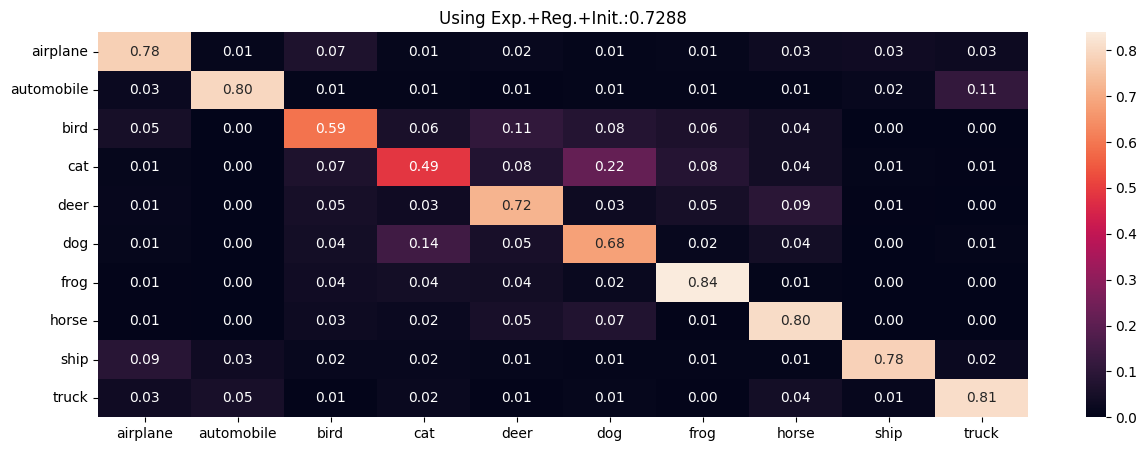

In [31]:
summarize_net(resnet2, X_test, y_test, title_text='Using Exp.+Reg.+Init.:')

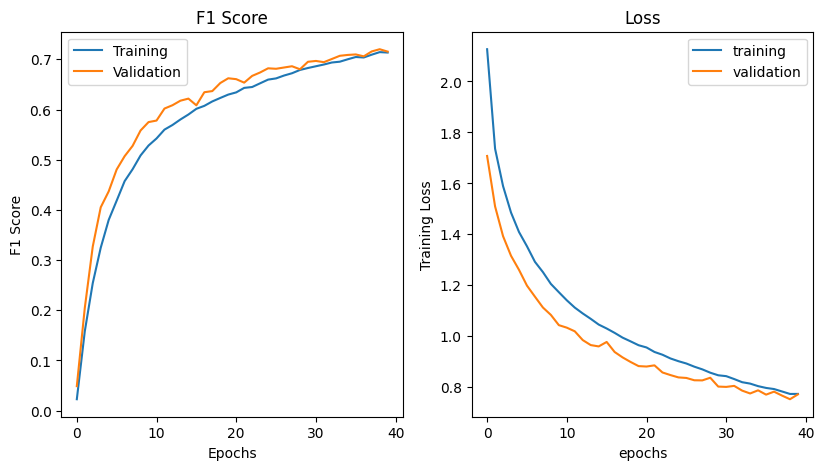

In [71]:
# Calculate F1 score for training and validation
train_f1_4 = 2 * (np.array(history4.history['precision']) * np.array(history4.history['recall'])) / (np.array(history4.history['precision']) + np.array(history4.history['recall']) + 1e-6)
val_f1_4 = 2 * (np.array(history4.history['val_precision']) * np.array(history4.history['val_recall'])) / (np.array(history4.history['val_precision']) + np.array(history4.history['val_recall']) + 1e-6)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_f1_4, label='Training')
plt.plot(val_f1_4, label='Validation')
plt.title('F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()


plt.subplot(1,3,2)
plt.plot(history4.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history4.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()



In [72]:
recall_history4 = history4.history['val_recall']  # Average recall across epochs
precision_history4 = history4.history['val_precision']
f1_scores4 = 2 * (np.array(precision_history4) * np.array(recall_history4)) / (np.array(precision_history4) + np.array(recall_history4))

# Calculate the average F1 score
max_f1_score4 = np.max(f1_scores4)

# Print the average F1 score
print("Max F1 Score:", max_f1_score4)

print(f'Max validation  recall across epochs: {np.max(recall_history4)}')
print(f'Max validation precision across epochs: {np.max(precision_history4)}')


Max F1 Score: 0.7201583105085163
Max validation  recall across epochs: 0.6367999911308289
Max validation precision across epochs: 0.8340651988983154


Comparison between CNN models 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


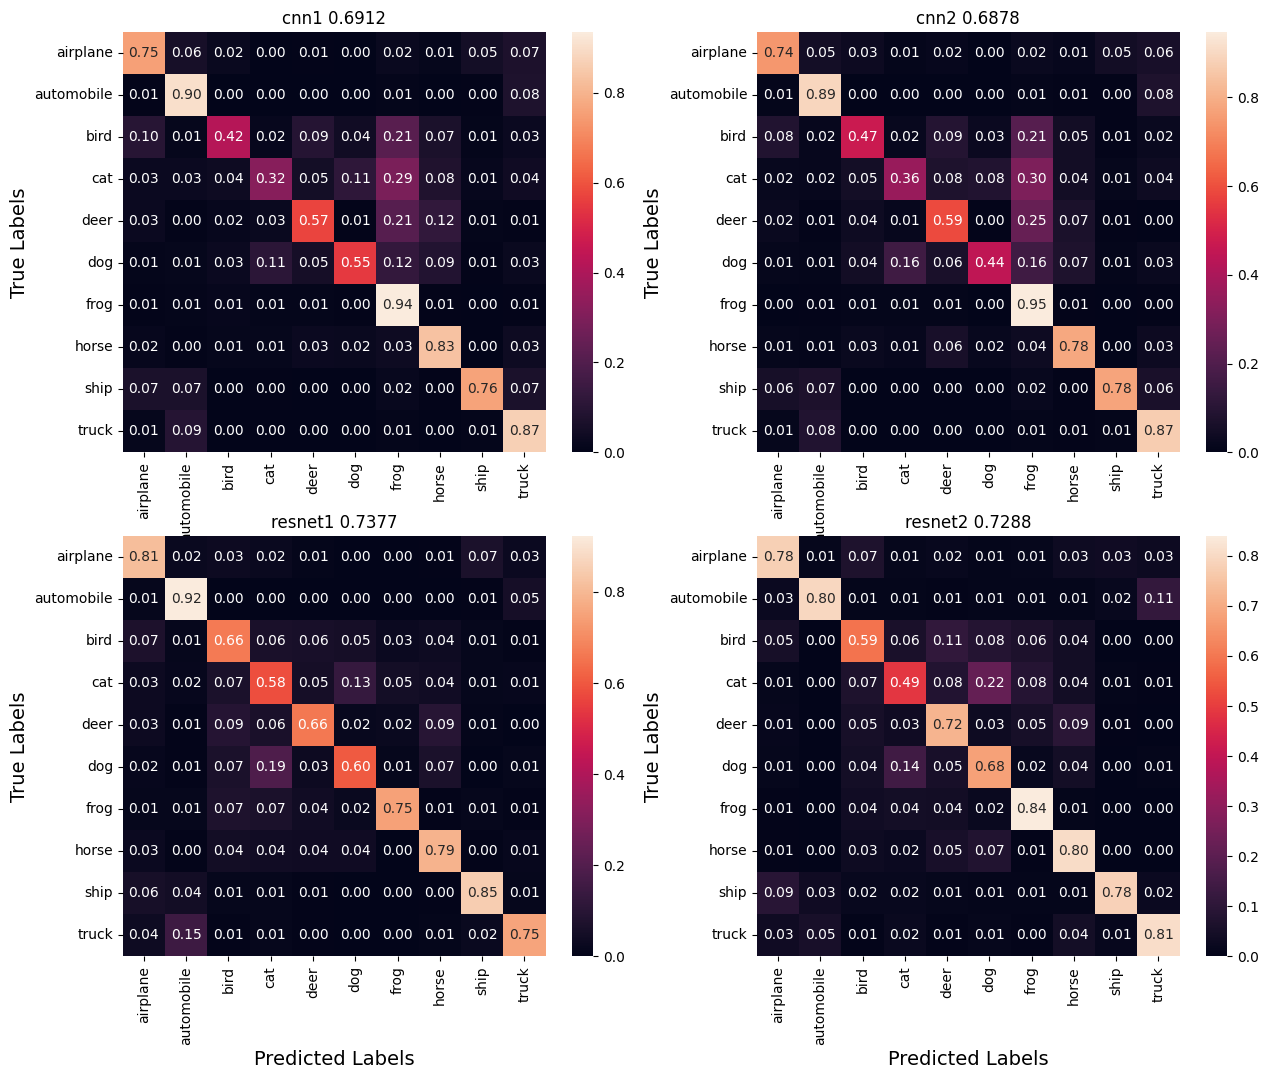

In [86]:
compare_cnn(cnn, cnn2, resnet, resnet2, X_test, y_test, title_text = '')

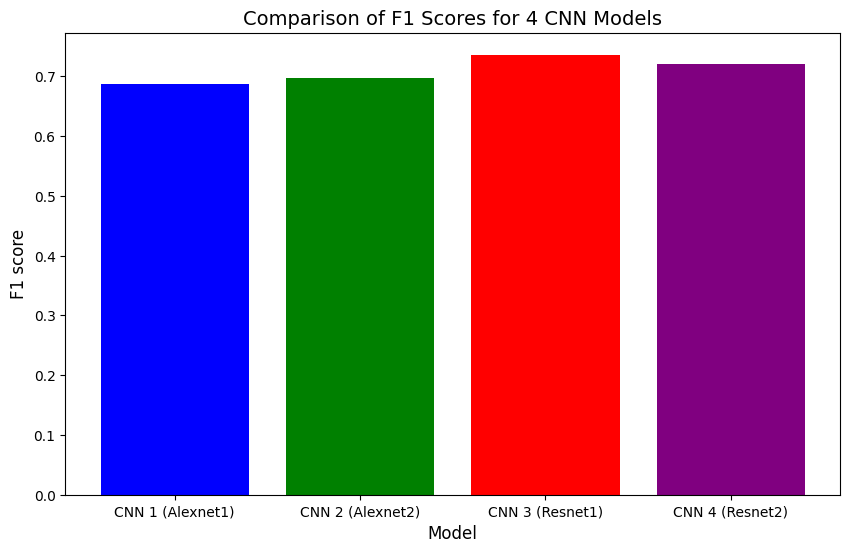

In [93]:
model_names = ['CNN 1 (Alexnet1)', 'CNN 2 (Alexnet2)', 'CNN 3 (Resnet1)', 'CNN 4 (Resnet2)']

f1_scores = [max_f1_score1, max_f1_score2, max_f1_score3, max_f1_score4]
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color=['blue', 'green', 'red', 'purple'])

# Customize plot
plt.title('Comparison of F1 Scores for 4 CNN Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1 score', fontsize=12)


# Show the plot
plt.show()


Do one way Annova

In [94]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(f1_scores1, f1_scores2, f1_scores3, f1_scores4)
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("At least one model's F1 score is significantly different.")
else:
    print("No significant difference in F1 scores among the models.")

F-statistic: 4.9677, P-value: 0.0025
At least one model's F1 score is significantly different.


In [104]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming f1_scores1, f1_scores2, f1_scores3, f1_scores4 are your F1 score arrays

# Combine all F1 scores into one dataset
f1_scores1 = np.array(f1_scores1)  # Ensure all scores are NumPy arrays
f1_scores2 = np.array(f1_scores2)
f1_scores3 = np.array(f1_scores3)
f1_scores4 = np.array(f1_scores4)

combined_f1_scores = np.concatenate([f1_scores1, f1_scores2, f1_scores3, f1_scores4])
combined_models = (
    ['CNN1'] * len(f1_scores1) +
    ['CNN2'] * len(f1_scores2) +
    ['CNN3'] * len(f1_scores3) +
    ['CNN4'] * len(f1_scores4)
)

# Convert to a DataFrame
data = pd.DataFrame({'F1 Score': combined_f1_scores, 'Model': combined_models})

# 1. Test for Homogeneity of Variances (Levene's Test)
stat, p_value_levene = levene(f1_scores1, f1_scores2, f1_scores3, f1_scores4)
print(f"Levene's test for homogeneity of variances: p-value = {p_value_levene}")

# 2. Perform One-Way ANOVA
stat, p_value_anova = f_oneway(f1_scores1, f1_scores2, f1_scores3, f1_scores4)
print(f"One-Way ANOVA: p-value = {p_value_anova}")

# 3. Post-hoc Tukey's HSD Test (if ANOVA p-value < 0.05)
if p_value_anova < 0.05:
    tukey = pairwise_tukeyhsd(endog=data['F1 Score'], groups=data['Model'], alpha=0.05)
    print(tukey)
else:
    print("No significant differences between models (ANOVA p-value > 0.05).")


Levene's test for homogeneity of variances: p-value = 0.007083307955667485
One-Way ANOVA: p-value = 0.002549154695681701
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  CNN1   CNN2   0.0166 0.8506 -0.0368    0.07  False
  CNN1   CNN3   0.0504 0.0714 -0.0029  0.1038  False
  CNN1   CNN4   -0.027 0.5559 -0.0803  0.0264  False
  CNN2   CNN3   0.0338 0.3559 -0.0195  0.0872  False
  CNN2   CNN4  -0.0436 0.1509 -0.0969  0.0098  False
  CNN3   CNN4  -0.0774 0.0013 -0.1308 -0.0241   True
----------------------------------------------------


Here, we look to see if the p-adj is less than .05. If it is, the F1 scores of the models are statistically different. We see that only models with statistically significant differences in F1 score is between models 2 and 3. The other pairs of models shown perform similarly to eachother. We are doing this statistical comparison of F1 score across epochs of the model. IF we were doing the F1 score in a k-split situation, we would be evaluatiing the F1 score on different datasets. Here, we are evaluation the difference in performance across epochs. 

MLP

In [34]:


# make a 3 layer keras MLP
mlp = Sequential()
mlp.add( Flatten() ) # make images flat for the MLP input
mlp.add( Dense(input_dim=1, units=30, 
               activation='relu') )
mlp.add( Dense(units=15, activation='relu') )
mlp.add( Dense(10) )
mlp.add( Activation('softmax') )

mlp.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy', 'recall', 'precision'])

history_mlp = mlp.fit(X_train, y_train, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=1,
        validation_data=(X_test, y_test))

/Users/kierstenwener/Desktop/MLLab6/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.2027 - loss: 0.0858 - precision: 0.4913 - recall: 0.0103 - val_accuracy: 0.2866 - val_loss: 0.0811 - val_precision: 0.5785 - val_recall: 0.0516
Epoch 2/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - accuracy: 0.3136 - loss: 0.0800 - precision: 0.5873 - recall: 0.0734 - val_accuracy: 0.3012 - val_loss: 0.0806 - val_precision: 0.5507 - val_recall: 0.1157
Epoch 3/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.3350 - loss: 0.0784 - precision: 0.5999 - recall: 0.1010 - val_accuracy: 0.3547 - val_loss: 0.0766 - val_precision: 0.6486 - val_recall: 0.1091
Epoch 4/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.3498 - loss: 0.0773 - precision: 0.6104 - recall: 0.1151 - val_accuracy: 0.3535 - val_loss: 0.0775 - val_precision: 0.5703 - val_recall: 0.1306
Epoch 5/150
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.3716 - loss: 0.0759 - precision: 0.6148 - recall: 0.1342 - val_accura

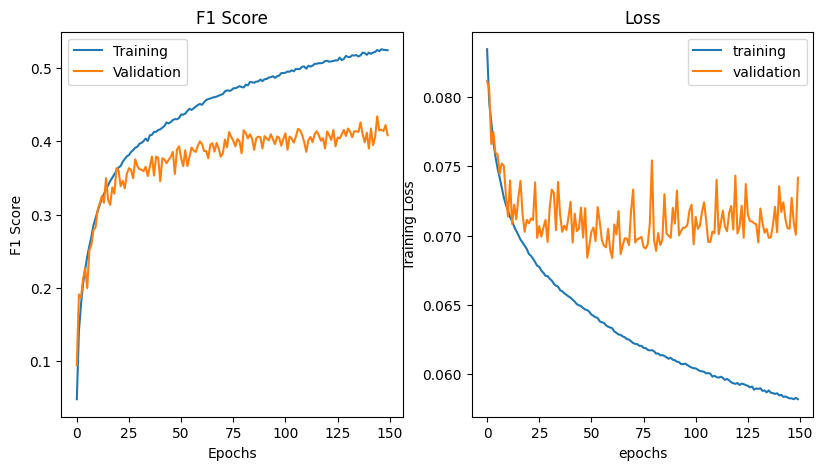

In [73]:
# Calculate F1 score for training and validation
train_f1_mlp = 2 * (np.array(history_mlp.history['precision']) * np.array(history_mlp.history['recall'])) / (np.array(history_mlp.history['precision']) + np.array(history_mlp.history['recall']) + 1e-6)
val_f1_mlp = 2 * (np.array(history_mlp.history['val_precision']) * np.array(history_mlp.history['val_recall'])) / (np.array(history_mlp.history['val_precision']) + np.array(history_mlp.history['val_recall']) + 1e-6)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_f1_mlp, label='Training')
plt.plot(val_f1_mlp, label='Validation')
plt.title('F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()


plt.subplot(1,3,2)
plt.plot(history_mlp.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history_mlp.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()


In [74]:
recall_history_mlp = history_mlp.history['val_recall']  # Average recall across epochs
precision_history_mlp = history_mlp.history['val_precision']
f1_scores_mlp = 2 * (np.array(precision_history_mlp) * np.array(recall_history_mlp)) / (np.array(precision_history_mlp) + np.array(recall_history_mlp))

# Calculate the average F1 score
max_f1_score_mlp = np.max(f1_scores_mlp)

# Print the average F1 score
print("Max F1 Score:", max_f1_score_mlp)

print(f'Max validation  recall across epochs: {np.max(recall_history_mlp)}')
print(f'Max validation precision across epochs: {np.max(precision_history_mlp)}')


Max F1 Score: 0.43405169877570104
Max validation  recall across epochs: 0.3434000015258789
Max validation precision across epochs: 0.6685082912445068
